1. Download the Dataset:

2. Load the Dataset:

In [222]:
import pandas as pd
import numpy as np

In [223]:
df = pd.read_csv(r"C:/Users/kasipra/OneDrive/Desktop/Mall_Customers.csv")

In [224]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


3. Visualizations:

 Univariate Analysis:

In [225]:
import seaborn as sns

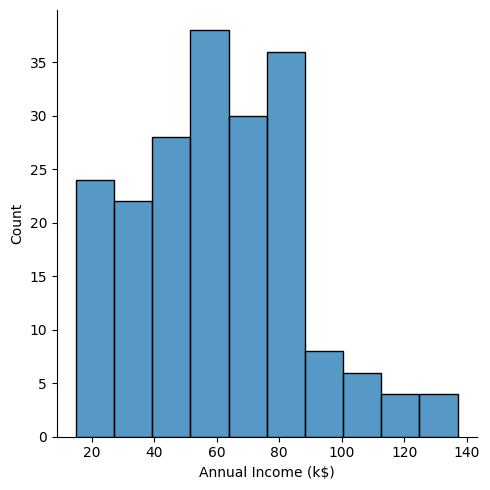

In [226]:
sns.displot(df['Annual Income (k$)'])

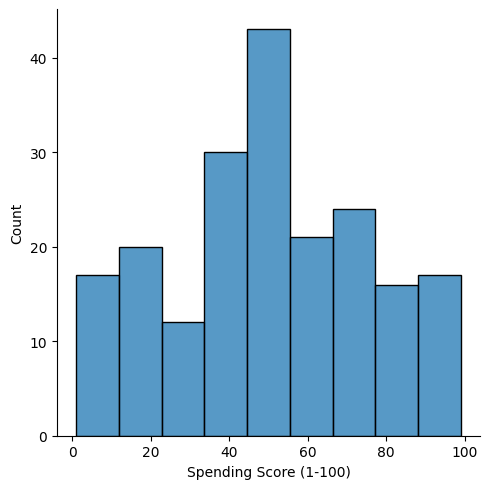

In [227]:
sns.displot(df['Spending Score (1-100)'])

Bi-variate Analysis:

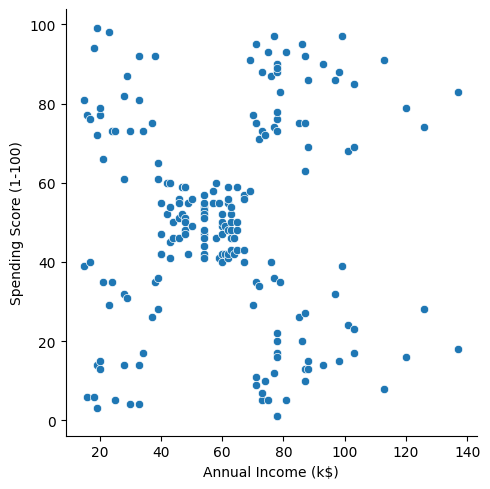

In [228]:
sns.relplot(x = "Annual Income (k$)", y = 'Spending Score (1-100)', data = df)

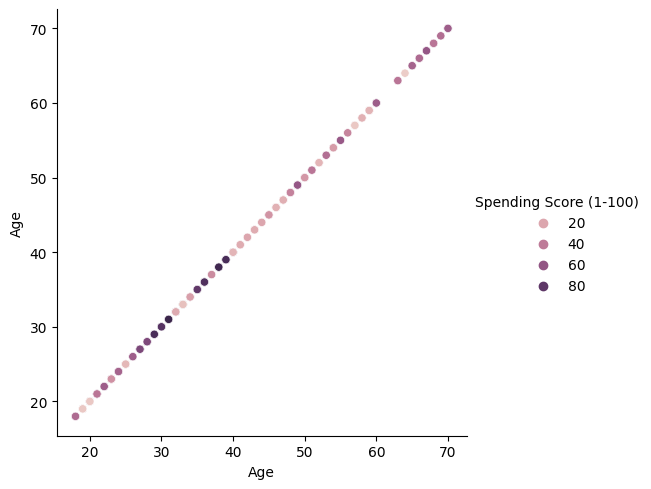

In [229]:
sns.relplot(x = "Age", y = "Age", hue = "Spending Score (1-100)", data = df)

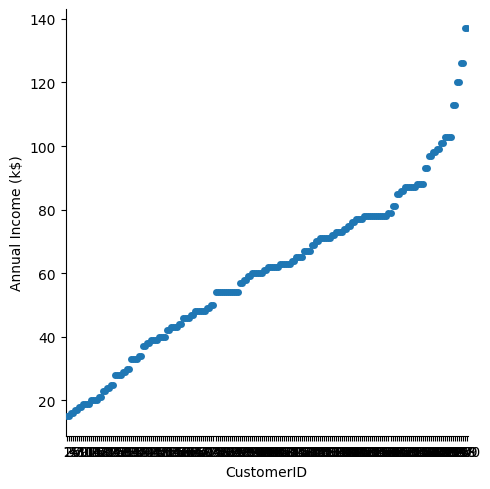

In [230]:
sns.catplot(x = "CustomerID", y = "Annual Income (k$)", data = df)

Multi-variate Analysis:

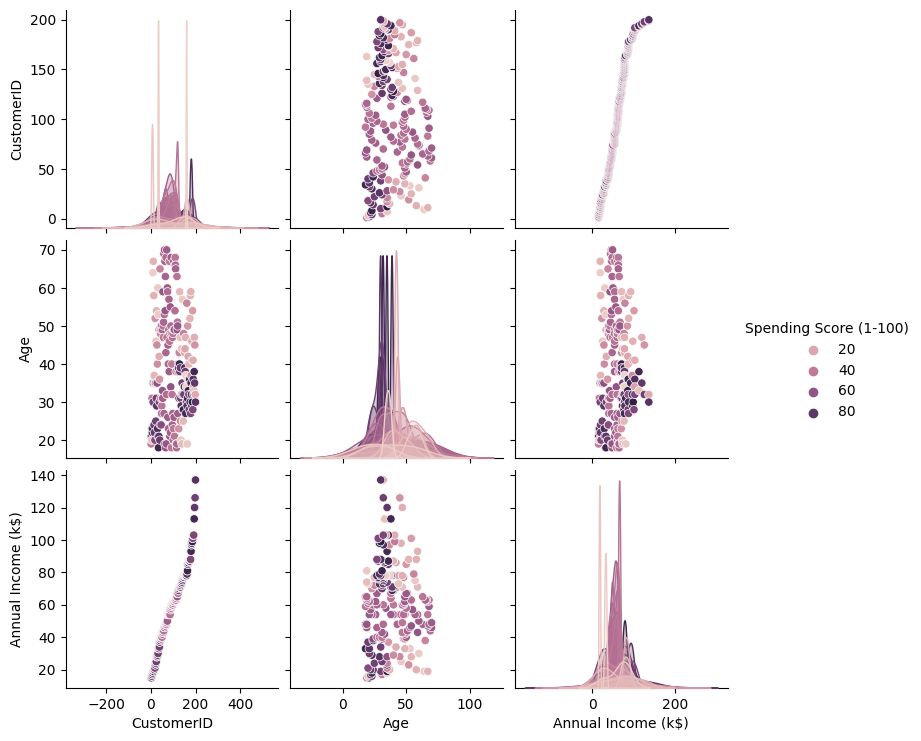

In [231]:
sns.pairplot(data = df,hue = "Spending Score (1-100)")

4. Descriptive Statistics:

In [232]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [234]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [235]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

5. Missing values and deal with them :

In [236]:
df['Annual Income (k$)'].mean()

60.56

In [237]:
df['Spending Score (1-100)'].min()

1

In [238]:
df['Age'].mode()[0]

32

In [239]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [240]:
df['Annual Income (k$)'].mode()[0]

54

6. Outliers and Replace Outliers:

In [241]:
df.skew()

C:\Users\hemaa\AppData\Local\Temp\ipykernel_24716\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

<AxesSubplot: >

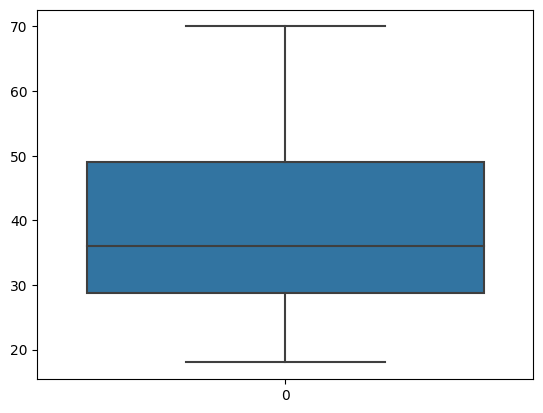

In [242]:
sns.boxplot(df["Age"])

<AxesSubplot: >

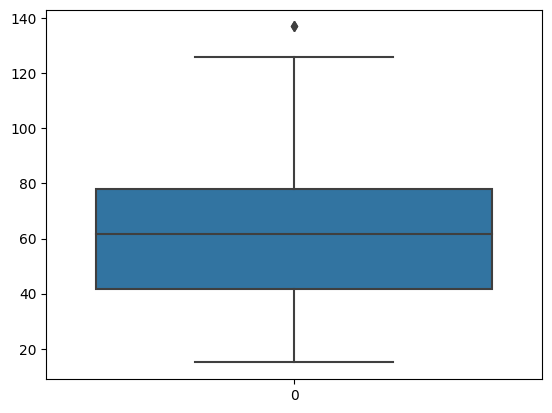

In [243]:
sns.boxplot(df["Annual Income (k$)"])

<AxesSubplot: >

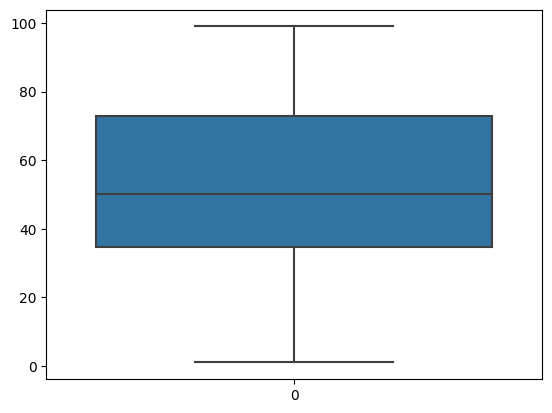

In [244]:
sns.boxplot(df["Spending Score (1-100)"])

<AxesSubplot: xlabel='Age', ylabel='Density'>

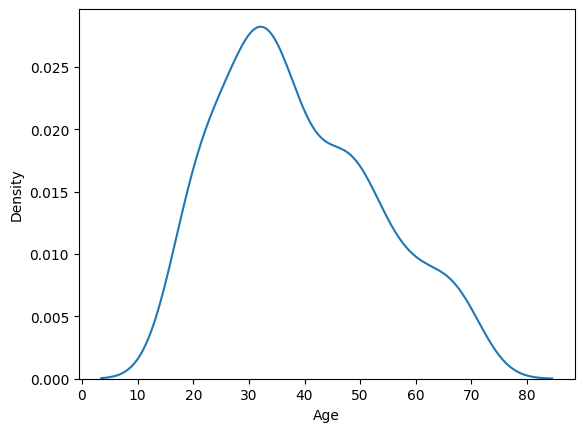

In [245]:
sns.kdeplot(df["Age"])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

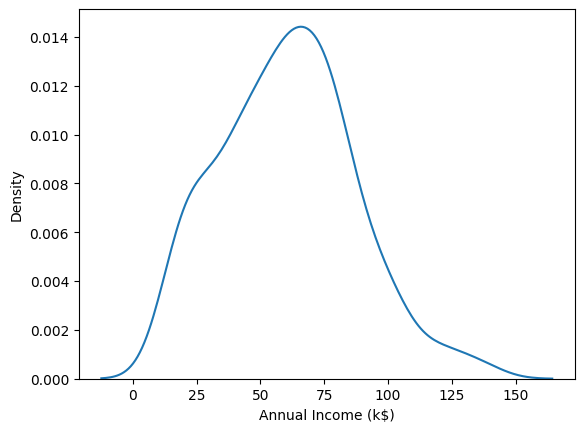

In [246]:
sns.kdeplot(df["Annual Income (k$)"])

In [247]:
q1 = df["Annual Income (k$)"].describe()["25%"]
q1

41.5

In [248]:
q3 = df["Spending Score (1-100)"].describe()["75%"]
q3

73.0

In [249]:
iqr = q3-q1
iqr

31.5

In [250]:
l_b = q1-(1.5*iqr)
u_b = q3+(1.5*iqr)

In [251]:
l_b

-5.75

In [252]:
u_b

120.25

In [253]:
outlier_list = list(df[df["Spending Score (1-100)"]>l_b]["Spending Score (1-100)"])

In [254]:
outlier_list

[39,
 81,
 6,
 77,
 40,
 76,
 6,
 94,
 3,
 72,
 14,
 99,
 15,
 77,
 13,
 79,
 35,
 66,
 29,
 98,
 35,
 73,
 5,
 73,
 14,
 82,
 32,
 61,
 31,
 87,
 4,
 73,
 4,
 92,
 14,
 81,
 17,
 73,
 26,
 75,
 35,
 92,
 36,
 61,
 28,
 65,
 55,
 47,
 42,
 42,
 52,
 60,
 54,
 60,
 45,
 41,
 50,
 46,
 51,
 46,
 56,
 55,
 52,
 59,
 51,
 59,
 50,
 48,
 59,
 47,
 55,
 42,
 49,
 56,
 47,
 54,
 53,
 48,
 52,
 42,
 51,
 55,
 41,
 44,
 57,
 46,
 58,
 55,
 60,
 46,
 55,
 41,
 49,
 40,
 42,
 52,
 47,
 50,
 42,
 49,
 41,
 48,
 59,
 55,
 56,
 42,
 50,
 46,
 43,
 48,
 52,
 54,
 42,
 46,
 48,
 50,
 43,
 59,
 43,
 57,
 56,
 40,
 58,
 91,
 29,
 77,
 35,
 95,
 11,
 75,
 9,
 75,
 34,
 71,
 5,
 88,
 7,
 73,
 10,
 72,
 5,
 93,
 40,
 87,
 12,
 97,
 36,
 74,
 22,
 90,
 17,
 88,
 20,
 76,
 16,
 89,
 1,
 78,
 1,
 73,
 35,
 83,
 5,
 93,
 26,
 75,
 20,
 95,
 27,
 63,
 13,
 75,
 10,
 92,
 13,
 86,
 15,
 69,
 14,
 90,
 32,
 86,
 15,
 88,
 39,
 97,
 24,
 68,
 17,
 85,
 23,
 69,
 8,
 91,
 16,
 79,
 28,
 74,
 18,
 83]

In [255]:
outlier_dict = {}.fromkeys(outlier_list,u_b)

In [256]:
outlier_dict

{39: 120.25,
 81: 120.25,
 6: 120.25,
 77: 120.25,
 40: 120.25,
 76: 120.25,
 94: 120.25,
 3: 120.25,
 72: 120.25,
 14: 120.25,
 99: 120.25,
 15: 120.25,
 13: 120.25,
 79: 120.25,
 35: 120.25,
 66: 120.25,
 29: 120.25,
 98: 120.25,
 73: 120.25,
 5: 120.25,
 82: 120.25,
 32: 120.25,
 61: 120.25,
 31: 120.25,
 87: 120.25,
 4: 120.25,
 92: 120.25,
 17: 120.25,
 26: 120.25,
 75: 120.25,
 36: 120.25,
 28: 120.25,
 65: 120.25,
 55: 120.25,
 47: 120.25,
 42: 120.25,
 52: 120.25,
 60: 120.25,
 54: 120.25,
 45: 120.25,
 41: 120.25,
 50: 120.25,
 46: 120.25,
 51: 120.25,
 56: 120.25,
 59: 120.25,
 48: 120.25,
 49: 120.25,
 53: 120.25,
 44: 120.25,
 57: 120.25,
 58: 120.25,
 43: 120.25,
 91: 120.25,
 95: 120.25,
 11: 120.25,
 9: 120.25,
 34: 120.25,
 71: 120.25,
 88: 120.25,
 7: 120.25,
 10: 120.25,
 93: 120.25,
 12: 120.25,
 97: 120.25,
 74: 120.25,
 22: 120.25,
 90: 120.25,
 20: 120.25,
 16: 120.25,
 89: 120.25,
 1: 120.25,
 78: 120.25,
 83: 120.25,
 27: 120.25,
 63: 120.25,
 86: 120.25,
 69: 1

In [257]:
df["Annual Income (k$)"] = df["Annual Income (k$)"].replace(outlier_dict)

In [258]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,120.25,39
1,2,Male,21,120.25,81
2,3,Female,20,120.25,6
3,4,Female,23,120.25,77
4,5,Female,31,120.25,40
...,...,...,...,...,...
195,196,Female,35,120.00,79
196,197,Female,45,126.00,28
197,198,Male,32,126.00,74
198,199,Male,32,137.00,18


In [259]:
df[df["Annual Income (k$)"]>l_b]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,120.25,39
1,2,Male,21,120.25,81
2,3,Female,20,120.25,6
3,4,Female,23,120.25,77
4,5,Female,31,120.25,40
...,...,...,...,...,...
195,196,Female,35,120.00,79
196,197,Female,45,126.00,28
197,198,Male,32,126.00,74
198,199,Male,32,137.00,18


7. Categorical columns and Perform Encoding:

In [260]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [261]:
from sklearn.preprocessing import LabelEncoder

In [262]:
l=LabelEncoder()
df["Annual Income (k$)"]=l.fit_transform(df["Annual Income (k$)"])
df["Age"]=l.fit_transform(df["Age"])

In [263]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,1,15,39
1,2,Male,3,15,81
2,3,Female,2,15,6
3,4,Female,5,15,77
4,5,Female,13,15,40
5,6,Female,4,15,76
6,7,Female,17,15,6
7,8,Female,5,15,94
8,9,Male,44,0,3
9,10,Female,12,0,72


8. Scale the data :

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
print(df)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male -1.446834                  15                      39
1             2    Male -1.299798                  15                      81
2             3  Female -1.373316                  15                       6
3             4  Female -1.152762                  15                      77
4             5  Female -0.564618                  15                      40
..          ...     ...       ...                 ...                     ...
195         196  Female -0.270546                  14                      79
196         197  Female  0.464634                  16                      28
197         198    Male -0.491100                  16                      74
198         199    Male -0.491100                  17                      18
199         200    Male -0.638136                  17                      83

[200 rows x 5 columns]


9.clustering algorithms


In [265]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [266]:
x = [15, 15, 18, 19, 21, 30, 33 , 103, 113, 126]
y = [21, 19, 23, 67, 24, 58, 30, 40, 65, 59]

In [267]:
data = list(zip(x, y))

In [268]:
print(data)

[(15, 21), (15, 19), (18, 23), (19, 67), (21, 24), (30, 58), (33, 30), (103, 40), (113, 65), (126, 59)]
